In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
#from google.colab import files 
#uploaded = files.upload()

Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


## Read Data

In [ ]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_rating = pd.merge(ratings, movies, how='inner', on = 'movieId')
movie_rating[-20:]

,userId,movieId,rating,timestamp,title,genres
100816,610,139511,3.0,1479545400,Exte: Hair Extensions (2007),Horror
100817,610,139655,3.0,1493848639,Goodnight Mommy (Ich seh ich seh) (2014),Drama|Fantasy|Horror|Thriller
100818,610,140267,4.0,1493848268,The Witch (2015),Horror
100819,610,141400,4.0,1479544170,Invincible Shaolin (1978),Action
100820,610,141799,3.5,1493848820,Cooties (2015),Comedy|Horror
100821,610,142366,3.0,1479543146,Cigarette Burns (2005),Horror|Thriller
100822,610,142598,4.0,1493848878,Last Shift (2014),Horror
100823,610,145951,0.5,1493849019,Bloodsport: The Dark Kumite (1999),Action|Thriller
100824,610,146309,4.0,1493850187,The Boy and the Beast (2015),Action|Adventure|Animation
100825,610,147657,4.0,1479544210,Masked Avengers (1981),Action


In [ ]:
len(ratings.userId.unique()), len(ratings.movieId.unique()), len(movie_rating.genres.unique())

(610, 9724, 951)

In [ ]:
movie_rating.genres = movie_rating.genres.astype('category').cat.codes.values
movie_rating.userId = movie_rating.userId.astype('category').cat.codes.values
movie_rating.movieId = movie_rating.movieId.astype('category').cat.codes.values
movie_rating[-20:]

,userId,movieId,rating,timestamp,title,genres
100816,609,8974,3.0,1479545400,Exte: Hair Extensions (2007),910
100817,609,8978,3.0,1493848639,Goodnight Mommy (Ich seh ich seh) (2014),819
100818,609,8995,4.0,1493848268,The Witch (2015),910
100819,609,9016,4.0,1479544170,Invincible Shaolin (1978),1
100820,609,9026,3.5,1493848820,Cooties (2015),709
100821,609,9045,3.0,1479543146,Cigarette Burns (2005),922
100822,609,9059,4.0,1493848878,Last Shift (2014),910
100823,609,9103,0.5,1493849019,Bloodsport: The Dark Kumite (1999),337
100824,609,9109,4.0,1493850187,The Boy and the Beast (2015),3
100825,609,9135,4.0,1479544210,Masked Avengers (1981),1


In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(movie_rating, test_size=0.2)

In [ ]:
import keras
from IPython.display import SVG
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_movies,n_genres = len(movie_rating.userId.unique()), len(movie_rating.movieId.unique()),len(movie_rating.genres.unique())
n_latent_factors = 2

In [ ]:
movie_input = keras.layers.Input(shape=[1],name='Movie')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)

prod = keras.layers.dot([movie_vec, user_vec], 1)
model_MF = keras.Model([user_input, movie_input], prod)
model_MF.compile('adam', 'mean_squared_error')

## Deep Neural Networks for Recommendation

In [ ]:
import keras
from IPython.display import SVG
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_movies,n_genres = len(movie_rating.userId.unique()), len(movie_rating.movieId.unique()),len(movie_rating.genres.unique())
n_latent_factors = 2

In [ ]:
n_latent_factors_user = 2
n_latent_factors_movie = 3

movie_input = keras.layers.Input(shape=[1],name='Movie')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors_movie, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)
movie_vec = keras.layers.Dropout(0.2)(movie_vec)


user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(n_users + 1, n_latent_factors_user, name='User-Embedding')(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)
user_vec = keras.layers.Dropout(0.2)(user_vec)


concat = keras.layers.concatenate([movie_vec, user_vec],name='Concat')
concat_dropout = keras.layers.Dropout(0.2)(concat)
dense = keras.layers.Dense(200,name='FullyConnected')(concat)
dropout_1 = keras.layers.Dropout(0.2,name='Dropout')(dense)
dense_2 = keras.layers.Dense(100,name='FullyConnected-1')(concat)
dropout_2 = keras.layers.Dropout(0.2,name='Dropout')(dense_2)
dense_3 = keras.layers.Dense(50,name='FullyConnected-2')(dense_2)
dropout_3 = keras.layers.Dropout(0.2,name='Dropout')(dense_3)
dense_4 = keras.layers.Dense(20,name='FullyConnected-3', activation='relu')(dense_3)


result = keras.layers.Dense(1, activation='relu',name='Activation')(dense_4)
adam = Adam(lr=0.005)
model = keras.Model([movie_input, user_input], result)
model.compile(optimizer=adam,loss= 'mean_squared_error')

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 3)         29175       ['Movie[0][0]']                  
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 2)         1222        ['User[0][0]']                   
                                                                                            

In [ ]:
max(train.userId)

609

In [ ]:
history = model.fit([train.movieId, train.userId], train.rating, epochs=100, verbose=0)

Text(0, 0.5, 'Train Error')

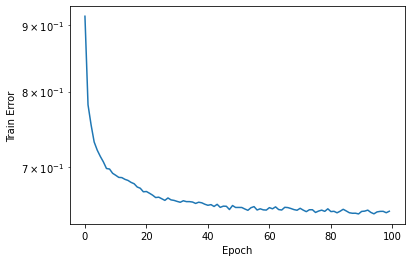

In [ ]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")

In [ ]:
# NN
import math
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
y_hat = np.round(model.predict([test.movieId, test.userId]),5)
y_true = test.rating

print(mean_absolute_error(y_true, y_hat))
print(mean_squared_error(y_true, y_hat))
print(math.sqrt(mean_squared_error(y_true, y_hat)))

0.6740918641371334
0.7726902208361194
0.8790279977544057


In [ ]:
test['Predicted'] = y_hat
test[:10]

,userId,movieId,rating,timestamp,title,genres,Predicted
47825,598,8119,3.0,1498530998,Oblivion (2013),128,2.32222
77210,324,3224,3.0,1039398324,Tootsie (1982),732,3.70006
57221,183,8668,3.5,1537099659,Avengers: Age of Ultron (2015),127,3.57409
34576,362,1397,2.0,1502584438,Armageddon (1998),326,2.92840
90689,291,2969,3.0,1293562754,"Eagle Has Landed, The (1976)",884,3.41676
11397,602,1575,3.0,953928033,Indiana Jones and the Temple of Doom (1984),106,3.56366
36016,290,3633,3.0,1464337114,"Lord of the Rings: The Fellowship of the Ring,...",490,4.40586
21518,68,964,5.0,1021644619,Unforgiven (1992),886,4.51562
73090,225,6037,3.0,1162249571,Syriana (2005),881,3.70125
38969,273,5380,2.0,1173041211,Ocean's Twelve (2004),194,3.23888
